## MODEL TRAINING
 Model objective: Predict math score based on dataset variables.
 

Import libraries for model training

In [149]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
import warnings


In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
# create predictors data set
X = df.drop(columns=['math_score'],axis=1 ) # axis = 1 for column(col wise operation) , axis=0 for index (row wise ioperation)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
# create target variable 
Y=df['math_score']

In [7]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [18]:
X.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
reading_score                   int64
writing_score                   int64
dtype: object

In [25]:
# Separate pipelines for  numerical and categorical columns

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns



In [218]:
list(num_features)

['reading_score', 'writing_score']

In [219]:
list(cat_features)

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [56]:
X.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   reading_score                1000 non-null   int64 
 6   writing_score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [57]:
X.shape 

(1000, 7)

In [27]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [59]:
#train test spilt 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((800, 7), (200, 7), (800,), (200,))

<bound method NDFrame.head of 29     62
535    66
695    79
557    61
836    73
       ..
106    87
270    69
860    53
435    50
102    85
Name: math_score, Length: 800, dtype: int64>

In [189]:
#preprocess 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop='if_binary')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [190]:
#transform X_train and X_test on 
X_train_transformed = preprocessor.fit_transform(X_train) # fit and transform   
X_test_transformed = preprocessor.transform(X_test)      # using training fit model for transforming test set

In [191]:
preprocessor.get_feature_names_out()

array(['OneHotEncoder__gender_male',
       'OneHotEncoder__race_ethnicity_group A',
       'OneHotEncoder__race_ethnicity_group B',
       'OneHotEncoder__race_ethnicity_group C',
       'OneHotEncoder__race_ethnicity_group D',
       'OneHotEncoder__race_ethnicity_group E',
       "OneHotEncoder__parental_level_of_education_associate's degree",
       "OneHotEncoder__parental_level_of_education_bachelor's degree",
       'OneHotEncoder__parental_level_of_education_high school',
       "OneHotEncoder__parental_level_of_education_master's degree",
       'OneHotEncoder__parental_level_of_education_some college',
       'OneHotEncoder__parental_level_of_education_some high school',
       'OneHotEncoder__lunch_standard',
       'OneHotEncoder__test_preparation_course_none',
       'StandardScaler__reading_score', 'StandardScaler__writing_score'],
      dtype=object)

In [194]:
X_train_transformed.shape

(800, 16)

In [195]:
X_train_transformed[1]

array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.9302895 ,
       0.96470125])

In [82]:
##  MODEL EVALUATION METRICS

#mae,rmse,rsquare

def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,rmse,r2

In [196]:
#models to use

models = { 
 "Linear Regression":LinearRegression(),
 "Lasso": Lasso(),
 "Ridge": Ridge(),
 "KNN" : KNeighborsRegressor(),
 "Decision Tree": DecisionTreeRegressor(),
 "Random Forest": RandomForestRegressor(),
 "XGB":XGBRegressor(),
 "Catboost":CatBoostRegressor(verbose=False),
 "AdaBoost":AdaBoostRegressor()
}

model_list=[]
r2_list=[]
mae_list=[]
rmse_list=[]


for i in range(len(models)):
    #train
    model=list(models.values())[i]
    model.fit(X_train_transformed,Y_train)
    
    #Predict
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred  = model.predict(X_test_transformed) 
    
    # Evaluate
    train_mae,train_rmse,train_r2 = evaluate_model(Y_train,y_train_pred)
    test_mae,test_rmse,test_r2 = evaluate_model(Y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('MODEL PERFORMANCE FOR TRAINING SET')
    print("- MAE : {:.4f} ".format(train_mae))
    print("- RMSE : {:.4f} ".format(train_rmse))
    print("- R2: {:.4f} ".format(train_r2))
    print('-'*35) 
    print('MODEL PERFORMANCE FOR TEST SET')
    print("- MAE : {:.4f} ".format(test_mae))
    print("- RMSE : {:.4f} ".format(test_rmse))
    print("- R2: {:.4f} ".format(test_r2))
    
    r2_list.append(test_r2)
    mae_list.append(test_mae)
    rmse_list.append(test_rmse)

    print('='*35)
    print('\n')

Linear Regression
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 4.2642 
- RMSE : 5.3259 
- R2: 0.8742 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 4.2015 
- RMSE : 5.3637 
- R2: 0.8818 


Lasso
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 5.2053 
- RMSE : 6.5925 
- R2: 0.8072 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 5.1557 
- RMSE : 6.5173 
- R2: 0.8254 


Ridge
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 4.2648 
- RMSE : 5.3235 
- R2: 0.8743 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 4.2115 
- RMSE : 5.3918 
- R2: 0.8805 


KNN
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 4.7310 
- RMSE : 5.9474 
- R2: 0.8431 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 5.9880 
- RMSE : 7.7063 
- R2: 0.7560 


Decision Tree
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 0.0187 
- RMSE : 0.2795 
- R2: 0.9997 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 6.4

In [197]:
pd.DataFrame(list(zip(model_list, r2_list,mae_list,rmse_list)), columns=['Model Name', 'R2_Score','MAE SCORE','RMSE SCORE']).sort_values(by=["MAE SCORE"],ascending=True) #sorted by MAE least to max

#best model by all metrics is Ridge regression

,Model Name,R2_Score,MAE SCORE,RMSE SCORE
0,Linear Regression,0.881771,4.201465,5.363726
2,Ridge,0.880533,4.211458,5.391753
5,Random Forest,0.852740,4.631918,5.986161
7,Catboost,0.850426,4.634613,6.033002
8,AdaBoost,0.849930,4.683838,6.042987
6,XGB,0.827797,5.057731,6.473307
1,Lasso,0.825446,5.155720,6.517347
3,KNN,0.755951,5.988000,7.706257
4,Decision Tree,0.726492,6.485000,8.158125


In [198]:
alphas = 10**np.linspace(10,-2,100)*0.5


In [199]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_transformed, Y_train)
ridgecv.alpha_

1.004616501282523

In [202]:
from sklearn.metrics import PredictionErrorDisplay


ridge_alpha_tuned= Ridge(alpha = ridgecv.alpha_)
ridge_alpha_tuned.fit(X_train_transformed, Y_train)
mean_absolute_error(Y_test,ridge_alpha_tuned.predict(X_test_transformed))

4.211446095253431

In [203]:


#features after transformation and weights
var_weights= pd.DataFrame(list(zip(list(preprocessor.get_feature_names_out()),ridge_alpha_tuned.coef_)),columns=['FEATURES','COEFF'])
var_weights.sort_values(by='COEFF')

,FEATURES,COEFF
9,OneHotEncoder__parental_level_of_education_mas...,-1.456450
3,OneHotEncoder__race_ethnicity_group C,-1.425096
4,OneHotEncoder__race_ethnicity_group D,-1.383572
1,OneHotEncoder__race_ethnicity_group A,-0.792073
7,OneHotEncoder__parental_level_of_education_bac...,-0.781595
2,OneHotEncoder__race_ethnicity_group B,-0.448747
6,OneHotEncoder__parental_level_of_education_ass...,-0.094223
11,OneHotEncoder__parental_level_of_education_som...,0.627598
8,OneHotEncoder__parental_level_of_education_hig...,0.806842
10,OneHotEncoder__parental_level_of_education_som...,0.897827


In [ ]:
lin_model = LinearRegression(fit_intercept=True)

lin_model.fit(X_train_transformed, Y_train)

In [214]:
y_pred_lin = lin_model.predict(X_test_transformed)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.05


In [215]:
#features importance for lin reg model  
var_weights= pd.DataFrame(list(zip(list(preprocessor.get_feature_names_out()),lin_model.coef_)),columns=['FEATURES','COEFF'])
var_weights.sort_values(by='COEFF')

,FEATURES,COEFF
9,OneHotEncoder__parental_level_of_education_mas...,-4.673451e+13
7,OneHotEncoder__parental_level_of_education_bac...,-4.673451e+13
6,OneHotEncoder__parental_level_of_education_ass...,-4.673451e+13
11,OneHotEncoder__parental_level_of_education_som...,-4.673451e+13
8,OneHotEncoder__parental_level_of_education_hig...,-4.673451e+13
10,OneHotEncoder__parental_level_of_education_som...,-4.673451e+13
13,OneHotEncoder__test_preparation_course_none,3.298365e+00
14,StandardScaler__reading_score,3.422672e+00
12,OneHotEncoder__lunch_standard,3.504950e+00
15,StandardScaler__writing_score,1.089489e+01


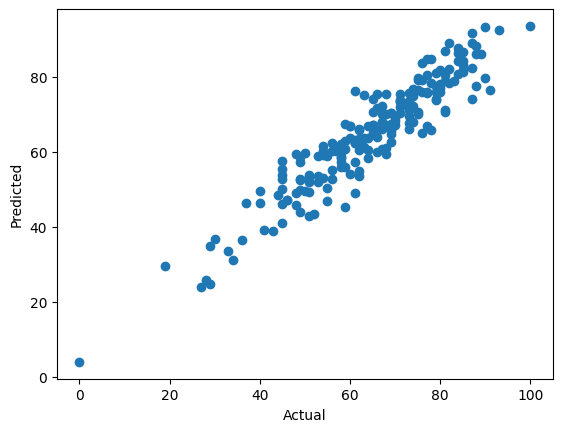

In [208]:
#scatter plot
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

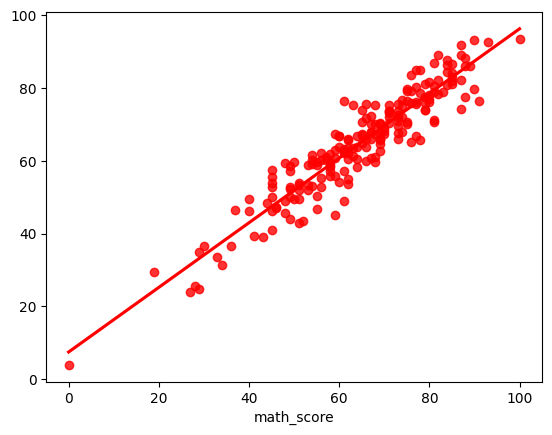

In [209]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

In [210]:
#diff 
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.402456,14.597544
737,53,58.862515,-5.862515
740,80,76.969081,3.030919
660,74,76.781390,-2.781390
411,84,87.604016,-3.604016
...,...,...,...
408,52,43.533944,8.466056
332,62,62.169122,-0.169122
208,74,67.924181,6.075819
613,65,67.071160,-2.071160
